In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)


In [143]:
def read_and_preprocess(file_name, columns_to_drop, crucial_na_columns):
    df = pd.read_csv(file_name)
    df.dropna(subset = [crucial_na_columns], inplace=True)
    df = df.drop(columns=[columns_to_drop])
    return df

def extract_country_row(df, country_name):
    df.loc[df['Country Name'] == country_name] = df.loc[df['Country Name'] == country_name].fillna(0)
    return df.loc[df['Country Name'] == country_name]

def plot_country_data(df, country_name, plot_line, plot_connections, starting_year, ending_year, removed_years):  
    y = np.array(extract_country_row(df, country_name).iloc[:, -(ending_year-starting_year+1):]).flatten()
    for i in range(len(y)):
        if y[i] != 0:
            break
    
    print(i)
    
    starting_year += i
    y = y[i:]
    x = np.array(range(starting_year, ending_year + 1))
    values_to_remove_from_x = []
    values_to_remove_from_y = []
    for i in range(len(x)):
        for j in range(len(removed_years)):
            if x[i] == removed_years[j]:
                values_to_remove_from_x.append(x[i])
                values_to_remove_from_y.append(y[i])
    x = [ele for ele in x if ele not in values_to_remove_from_x]
    y = [ele for ele in y if ele not in values_to_remove_from_y]

    
    
    
    m, b = np.polyfit(x, y, 1)
    if (plot_connections):
        plt.scatter(x, y)
        plt.plot(x, y)
    else:
        plt.plot(x, y, 'o')
    if plot_line:
        plt.plot(x, m*x + b)
        print(m)
        print(b)
    plt.title('% of primary school age children enrolled in school in ' + country_name + ' vs Time')
    plt.xlabel('Time (years)')
    plt.ylabel('% of children who enroll in school')
    
    plt.savefig(country_name + 'data.png')
    
def find_country_to_minimize_column(df, column_name):
    return df[df["2017"] == df["2017"].min()]["Country Name"]


In [144]:
df = read_and_preprocess("school_enrollment.csv", "2019", "2018")
df

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.34118,85.95611,86.99052,89.53195,95.41897,97.59204,97.79873,97.65542,97.77841,97.44221
5,Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.33249,85.43310,85.09152,85.20714,84.21832,84.25430,84.03523,84.53258,85.14375,85.38422
8,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,95.15386,96.41176,96.58810,94.12688,93.03258,92.49744,92.31421,90.84300
10,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,96.32810,95.97518,94.87391,NaN,93.73436,97.63492,NaN,97.55055,99.31010
13,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.51890,84.72605,87.26808,89.29003,93.67068,94.81210,94.26275,94.96529,97.93103,92.61575
14,Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.75957,95.49752,NaN,NaN,NaN,NaN,NaN,NaN,95.54934,93.41660
16,Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,94.23210,94.92278,94.80910,95.50633,NaN,96.36058,NaN,NaN,97.03352,97.21103
17,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,63.89452,NaN,64.89106,66.07414,66.97207,68.30377,69.95995,75.85293,77.00507,79.34168
20,Bahrain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,91.89966,92.75377,93.77229,95.76800,98.02753,97.90026,98.72605,98.10484
21,"Bahamas, The",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.08308,80.65799,85.85102,80.16219,74.89342,75.62908,79.96521,75.50359,NaN,74.38987


39


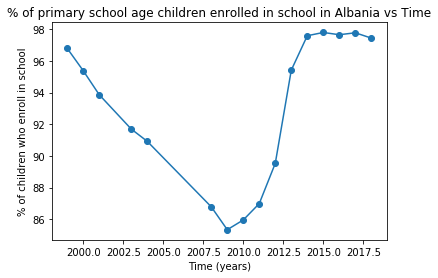

In [145]:
plot_country_data(df, "Albania", False, True, 1960, 2018, [2002, 2005, 2006, 2007])

25


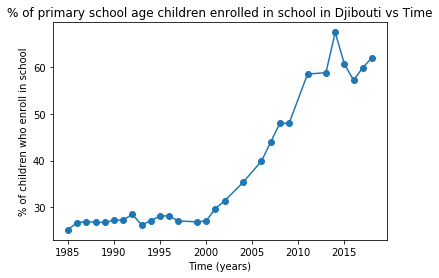

In [146]:
plot_country_data(df, "Djibouti", False, True, 1960, 2018, [1998, 2003, 2005, 2010,2012])

In [147]:
find_country_to_minimize_column(df, "2018")


67    Eritrea
Name: Country Name, dtype: object

32


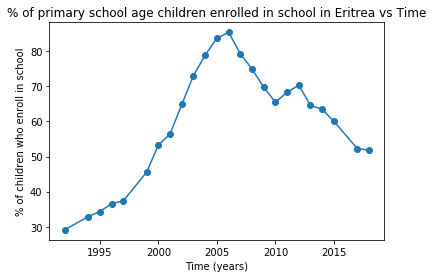

In [148]:
plot_country_data(df, "Eritrea", False, True, 1960, 2018, [1993,1998,2016])